In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

#### About the dataset 

This dataset was provided by Kaggle.com, with data sourced from [The Movie Database (TMDb)](https://www.themoviedb.org/?language=en). It contains information submitted by TMDb users on approximately 5000 movies. The data is split into two csv files, one for meta information describing the movies and the other for the casts of the movies. Kaggle link to the dataset can be found here: https://www.kaggle.com/tmdb/tmdb-movie-metadata 

### _Visual #1_: Movie Releases by Month

In [3]:
movies_df = pd.read_csv('tmdb_5000_movies.csv')

In [4]:
release_date_split =movies_df['release_date'].str.split(pat='-', expand=True).copy()

In [5]:
month_group = pd.DataFrame(release_date_split.groupby([1]).count()[0])

In [6]:
month_text_map = dict([
    ('01', 'January'),
    ('02', 'February'),
    ('03', ' March'),
    ('04', 'April'),
    ('05', 'May'),
    ('06', 'June'),
    ('07', 'July'),
    ('08', 'August'),
    ('09', 'September'),
    ('10', 'October'),
    ('11', 'November'),
    ('12', 'December')
])   

In [7]:
#x = month_group.index.to_series().sort_values().map(month_text_map)
x = month_group.index.to_series()

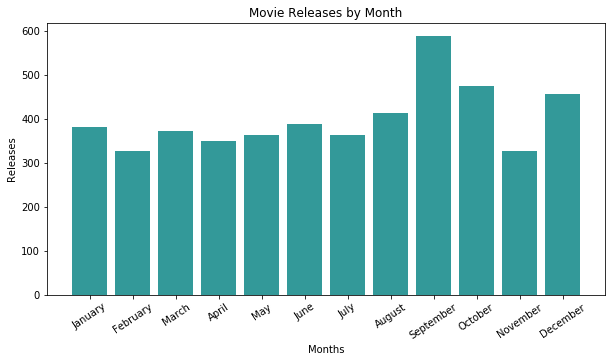

In [8]:
plt.figure(figsize=(10, 5))
plt.bar(x, month_group[0], alpha=0.8, color='teal')
plt.xticks(month_group.index, x.map(month_text_map), rotation=34)
plt.xlabel('Months')
plt.ylabel('Releases')
plt.title('Movie Releases by Month')
plt.show()

#### Movie Releases by Month - Analysis

The above bar chart shows the number of movies released by month. The most popular month to release a movie is far and away September, garning over 100 more releases than second place October or third place December, which differ by only 18 movies. Further exploratory analysis could investigate whether certain months are more profitable than others, or whether certain studios target different months than others. 

***

### _Visual #2_: Movie Runtimes

In [9]:
# Filter out movies that are 0 minutes long
runtime_data = movies_df.loc[movies_df['runtime'] > 0]['runtime'].copy()

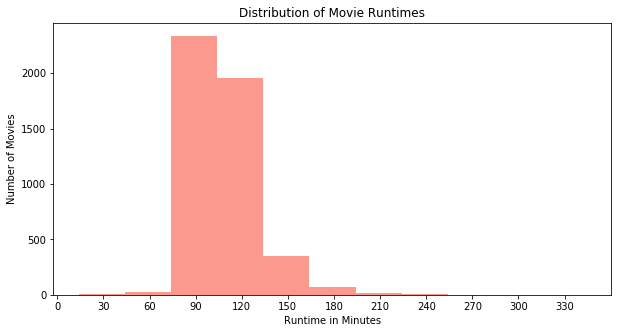

In [10]:
plt.figure(figsize=(10, 5))
plt.hist(runtime_data, bins=np.arange(np.min(runtime_data), 
                                      np.max(runtime_data) + 30, 30),
                                      color='salmon', alpha=0.8)
plt.xticks(np.arange(0, np.max(runtime_data)+1, 30.0))
plt.xlabel('Runtime in Minutes')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Runtimes')
plt.show()

#### Movie Runtimes - Analysis
The above Histogram illustrates the distribution of movie runtimes. The chart illustrates a left-skewed distribution, with most movies falling into the 90 - 120 minute bin with the second largest group failling between 120 - 150 minutes. 

Further analysis could compare the distribution of different runtimes subdivided by genre to investigate if certain genres tend to run longer than others. Another avenue of analysis is to assess the average runtime of movies by year, to identify possible trends in movie length. 

---

### _Visual #3_: Budget versus Profit

In [11]:
profit_data_df = movies_df.copy()
profit_data_df['profit'] = profit_data_df['revenue'] - profit_data_df['budget']

# Clean data to remove movies with 0 budget.
# Assumption: The budget in this dataset refers to the costs for producing 
# the movie, and you can't make a movie for free.
profit_data_df = profit_data_df.loc[profit_data_df['budget'] > 0]


In [12]:
#Taking the log of budget to scale it to profit percentage and to account for the extremely large budgets some movies have.
profit_data_df['log_budget'] = np.log(profit_data_df['budget'])

In [13]:
# Replace negative infinity with 0. Because the log of a movie with zero budget is negative infinity.
profit_data_df['log_budget'] = profit_data_df['log_budget'].replace((np.inf * -1), 0)

In [14]:
profit_data_df['log_profit'] = np.log(profit_data_df['profit'])
profit_data_df['log_profit'] = profit_data_df['log_profit'].replace((np.inf * -1), 0)

c:\users\greg\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
c:\users\greg\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


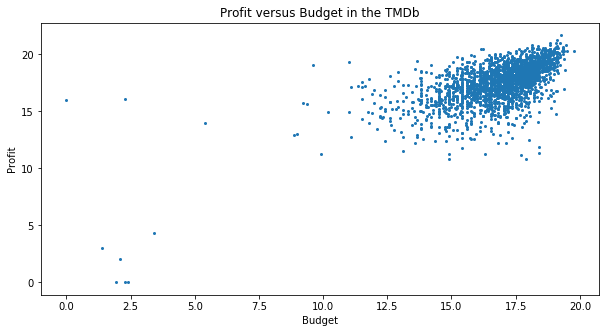

In [15]:
plt.figure(figsize=(10, 5))
plt.scatter(profit_data_df['log_budget'], profit_data_df['log_profit'], 
            marker='.', s=16)
plt.title('Profit versus Budget in the TMDb')
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.show()

#### Budget versus Profit: Analysis

The above scatterplot displays the log of profit versus the log of budget. While it does not illustrate the true ROI of these movies, the chart does seem to suggest that there is a positive relationship between budget and profit, meaning that the higher a movie's budget, the higher its revenue and profit (although this conculusion has not been verifired statistically).

Further analysis could investigate potential underlying causal variables driving profit. For example, an analysis of cast data could see if certain actors and actresses correlate to higher revenue. Alternatively, another analysis could investigate trends in both budgets and ROI over time to investigate if movies are relying increasing budgets to attract viewers. 

---

### _Visual #4_: Language Trends

In [85]:
language_df = movies_df[['release_date','original_language']].copy()
language_df['release_year'] = release_date_split[0]
language_df['english'] = language_df['original_language'] == 'en'
language_df['not_english'] = language_df['original_language'] != 'en'

In [86]:
language_df2 = language_df[['release_year', 'english', 'not_english']]

In [87]:
language_df2.head(5)

,release_year,english,not_english
0,2009,True,False
1,2007,True,False
2,2015,True,False
3,2012,True,False
4,2012,True,False


In [88]:
pivoted = pd.pivot_table(language_df2, index='release_year', aggfunc=np.sum)
pivoted.head(5)

,english,not_english
release_year,,
1916,1.0,0.0
1925,1.0,0.0
1927,0.0,1.0
1929,1.0,1.0
1930,1.0,0.0


In [89]:
pivoted.index = pivoted.index.map(int)

In [90]:
pivoted.index

Int64Index([1916, 1925, 1927, 1929, 1930, 1932, 1933, 1934, 1935, 1936, 1937,
            1938, 1939, 1940, 1941, 1942, 1944, 1945, 1946, 1947, 1948, 1949,
            1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
            1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016, 2017],
           dtype='int64', name='release_year')

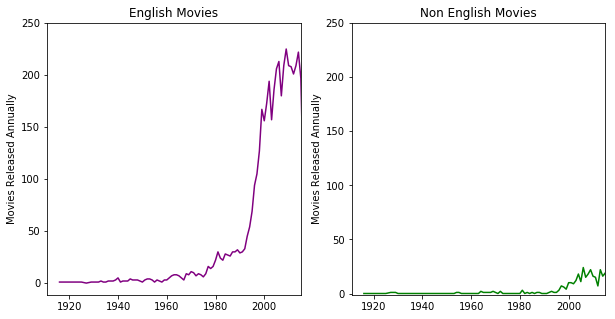

In [110]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(pivoted['english'], color='purple')
plt.ylabel('Movies Released Annually')

# Due to incomplete data in the years 2016 and 2017, there is a much lower 
# number of movies in the dataset for those years, so those years have beem
# removed from the chart. 
plt.xlim(xmax=2015)

plt.yticks(np.arange(0, pivoted['english'].max() + 50, 50))
plt.title('English Movies')

plt.subplot(1, 2, 2)
plt.plot(pivoted['not_english'], color='green')
plt.ylabel('Movies Released Annually')
plt.title('Non English Movies')
plt.xlim(xmax=2015)
plt.yticks(np.arange(0, pivoted['english'].max() + 50, 50))
plt.show()

#### Language Trends: Analysis

The two line charts illustrate a trend of increasing number of movies released in both english and other languages each year within the data contained in the TMDb. A cursory look at the data suggests that non-english movies have not grown at the same rate as english movies. 

Further statistical analysis could confirm that the proportion of movies without English as the original language is actually decreasing. More analysis could investigate if the same trend exists in the languages spoken within movies, to determine if english-speaking movie makers are catering to a broader global audience. 

---